# Inserisci titolo grafico qui

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from math import ceil, floor


OUT_FOLDER = 'grafici/DurataAvvistamenti'
FIGURE_SIZE = (20, 8)

%matplotlib inline

In [2]:
DATASET = 'ufos.csv'
data = pd.read_csv(DATASET)
len(data)

80332

In [3]:
bins = [0, 10, 30, 60 * 1, 60 * 2, 60 * 5, 60 * 15, 60*60, 60*60 * 4, 60*60*24, 10000000000]
def find_bin(x):
    for i in range(len(bins[:-1])):
        if bins[i] <= x < bins[i+1]:
            return i
    return len(bins)
counts = data['duration (seconds)'].groupby(find_bin).size()

def between(a, b):
    return len(data[(data['duration (seconds)'] >= a) & (data['duration (seconds)'] < b)])

counts = [between(bins[i], bins[i+1]) for i in range(len(bins[:-1]))]

In [4]:
TITLE = 'Durata degli avvistamenti'
YLABEL = 'Numero di avvistamenti'
XLABEL = "Durata dell'avvistamento"
LABELS = [
    '10 secondi', '30 secondi', '1 minuto', '2 minuti', '5 minuti', 
    '15 minuti', '1 ora', '4 ore', '1 giorno', 'di più'
]

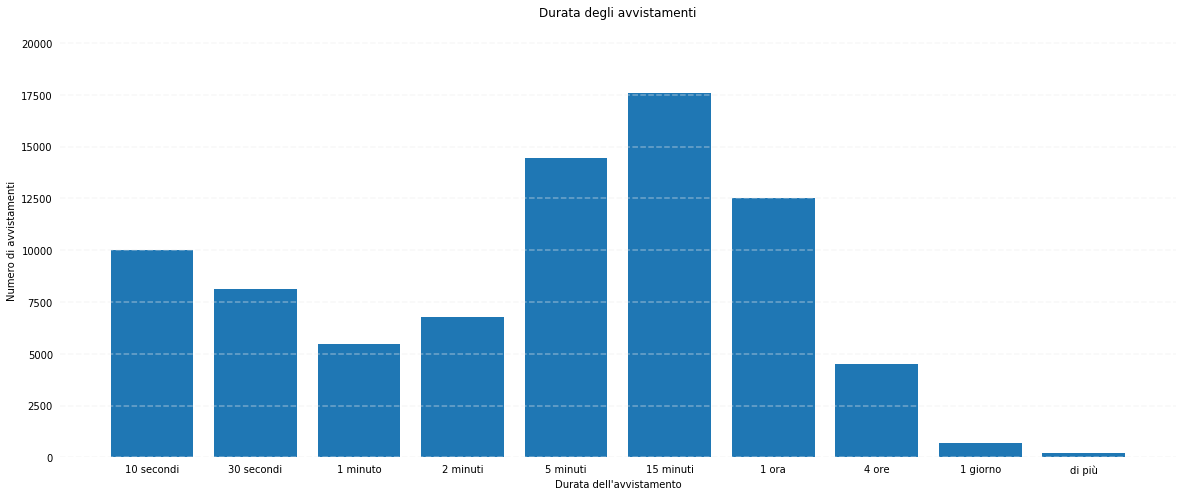

In [5]:
fig, ax = plt.subplots(figsize=FIGURE_SIZE)

bars = ax.bar(range(len(counts)), counts)

ax.set_xticks(range(len(LABELS)))
ax.set_xticklabels(LABELS)
ax.set_title(TITLE)
ax.set_ylabel(YLABEL)
ax.set_xlabel(XLABEL)

for spine in ['left', 'right', 'top', 'bottom']:
    ax.spines[spine].set_visible(False)

# Switch off ticks
ax.tick_params(
    axis="both", 
    which="both", 
    bottom=False, 
    top=False, 
    labelbottom=True, 
    left=False, 
    right=False, 
    labelleft=True, 
)

# Draw vertical axis lines
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

plt.savefig(f'{OUT_FOLDER}/BarChart.png')
plt.show()